# Inspect tables with direct emissions data and food items

This will determine the food items to focus on IN ALL THE PROJECT

In notebook eze_tables_explore\03_identify_tables_type.ipynb I identified this tables:

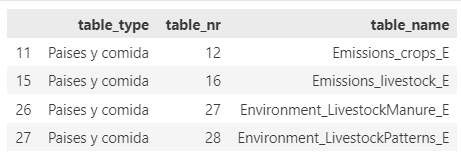

In [21]:
import pandas as pd
import numpy as np
import zipfile
import io
import os

#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
# directory = r'..\data\FAOSTAT\all_raw'
directory = r'..\data\all_raw'

In [23]:
selected_tables = [12, 16]#, 27, 28]

In [24]:
def load_fao_table(table_number, path):
    # Loop through all files in the directory
    for filename in os.listdir(path):
        # Extract the number from the start of the filename
        file_number_str = filename.split('-')[0]
        try:
            file_number = int(file_number_str)
            # Check if the number matches the table number
            if file_number == table_number:
                full_path = os.path.join(path, filename)

                if filename.endswith(".zip"):
                    # Open the zip file
                    with zipfile.ZipFile(full_path, 'r') as zip_ref:
                        # Iterate through the file names in the zip archive
                        for file_name in zip_ref.namelist():
                            # Check if the file name contains the pattern "All_Data_" and ends with .csv
                            if "All_Data" in file_name and file_name.endswith(".csv"):
                                # Read the CSV file into a DataFrame
                                with zip_ref.open(file_name) as file:
                                    return pd.read_csv(file, encoding="ISO-8859-1")

                elif filename.endswith(".csv"):
                    # Read the CSV file into a DataFrame
                    return pd.read_csv(full_path, encoding="ISO-8859-1")

        except ValueError:
            # Handle the case where the filename doesn't start with a valid number
            continue
    
    # Return None if no matching file is found
    return None


In [25]:
for table in selected_tables:
    df = load_fao_table(table, directory)
    #print(df.groupby('Item')['Element'].value_counts().to_frame().sort_values(by = 'count', ascending=False))
    print('\n', df['Item'].unique())
    print('\n', 'number of unique items:', len(df['Item'].unique()))
    print('\n')


 ['Barley' 'Maize (corn)' 'Sugar cane' 'Millet' 'Potatoes' 'Rice' 'Wheat'
 'All Crops' 'Nutrient nitrogen N (total)' 'Beans, dry' 'Oats' 'Rye'
 'Sorghum' 'Soya beans']

 number of unique items: 14



 ['Asses' 'Camels' 'Cattle, dairy' 'Cattle, non-dairy' 'Chickens, broilers'
 'Chickens, layers' 'Goats' 'Horses' 'Mules and hinnies' 'Sheep'
 'All Animals' 'Camels and Llamas' 'Cattle' 'Chickens' 'Mules and Asses'
 'Poultry Birds' 'Sheep and Goats' 'Buffalo' 'Ducks' 'Swine, breeding'
 'Swine, market' 'Turkeys' 'Swine' 'Llamas']

 number of unique items: 24




# Create merged table of these 4 tables with crops and livestock
As for emissions data, there is only data on animals and cereal crops. There is no data on fruits or other vegetables or processed products.

### This is the code to see the proccessing of one table

In [26]:
selected_tables = [12, 16]

In [31]:
# directory = r'..\data\FAOSTAT\all_raw'
directory = r'..\data\all_raw'

In [28]:
"""
# Load the data
df = load_fao_table(16, directory)

# Replace spaces and commas in column names
cols_with_spaces = ['Element', 'Unit']
for col in cols_with_spaces:
    df[col] = df[col].str.replace(' ', '_').str.replace(',', '_')

# Combine 'Element' and 'Unit' columns
df['Element'] = df['Element'] + "_(" + df['Unit'] + ")"

# Calculate the availability of each Element across Items
element_item_counts = df.groupby('Element')['Item'].nunique()

# Calculate the total number of unique Items
total_items = df['Item'].nunique()

# Filter Elements that are available for more than 80% of Items
threshold = 0.8
elements_to_keep = element_item_counts[element_item_counts / total_items > threshold].index

# Filter the dataframe to keep only the desired Elements
df = df[df['Element'].isin(elements_to_keep)].reset_index(drop=True)

# Group by Area, Year, Item, and Element, then sum the values
grouped = df.groupby(['Area', 'Year', 'Item', 'Element'])['Value'].sum().reset_index()

# Pivot the table to have combinations of Items and Elements as columns
pivot_df = grouped.pivot_table(index=['Area', 'Year', 'Item'], 
                                columns=['Element'], 
                                values='Value', 
                                aggfunc='sum').reset_index()

pivot_df
"""

'\n# Load the data\ndf = load_fao_table(16, directory)\n\n# Replace spaces and commas in column names\ncols_with_spaces = [\'Element\', \'Unit\']\nfor col in cols_with_spaces:\n    df[col] = df[col].str.replace(\' \', \'_\').str.replace(\',\', \'_\')\n\n# Combine \'Element\' and \'Unit\' columns\ndf[\'Element\'] = df[\'Element\'] + "_(" + df[\'Unit\'] + ")"\n\n# Calculate the availability of each Element across Items\nelement_item_counts = df.groupby(\'Element\')[\'Item\'].nunique()\n\n# Calculate the total number of unique Items\ntotal_items = df[\'Item\'].nunique()\n\n# Filter Elements that are available for more than 80% of Items\nthreshold = 0.8\nelements_to_keep = element_item_counts[element_item_counts / total_items > threshold].index\n\n# Filter the dataframe to keep only the desired Elements\ndf = df[df[\'Element\'].isin(elements_to_keep)].reset_index(drop=True)\n\n# Group by Area, Year, Item, and Element, then sum the values\ngrouped = df.groupby([\'Area\', \'Year\', \'Item\',

### This is the code to proccess all tables and merge

I merged in the end only emissions tables.

From here we select FOOD ITEMS.

In [32]:
merged_df = pd.DataFrame()

for table in selected_tables:
    # Load the data
    df = load_fao_table(table, directory)

    # Replace spaces and commas in column names
    cols_with_spaces = ['Element', 'Unit']
    for col in cols_with_spaces:
        df[col] = df[col].str.replace(' ', '_').str.replace(',', '_')

    # Combine 'Element' and 'Unit' columns
    df['Element'] = df['Element'] + "_(" + df['Unit'] + ")"

    # Calculate the availability of each Element across Items
    element_item_counts = df.groupby('Element')['Item'].nunique()

    # Calculate the total number of unique Items
    total_items = df['Item'].nunique()


    # Filter Elements that are available for more than 80% of Items
    #threshold = 0
    #elements_to_keep = element_item_counts[element_item_counts / total_items > threshold].index

    # Filter the dataframe to keep only the desired Elements
    #df = df[df['Element'].isin(elements_to_keep)].reset_index(drop=True)


    # Group by Area, Year, Item, and Element, then sum the values
    grouped = df.groupby(['Area Code', 'Area', 'Year', 'Item Code', 'Item', 'Element'])['Value'].sum().reset_index()

    # Pivot the table to have combinations of Items and Elements as columns
    pivot_df = grouped.pivot_table(index=['Area Code', 'Area', 'Year', 'Item Code', 'Item'], 
                                    columns=['Element'], 
                                    values='Value', 
                                    aggfunc='sum').reset_index()

    if merged_df.empty:
        merged_df = pivot_df
    else:
        merged_df = pd.merge(merged_df, pivot_df, on=['Area Code', 'Area', 'Year', 'Item Code', 'Item'], how='outer')

In [33]:
merged_df['Item'].unique()

array(['Wheat', 'Barley', 'Maize (corn)', 'Rye', 'Oats', 'Potatoes',
       'Beans, dry', 'Buffalo', 'Cattle, dairy', 'Cattle, non-dairy',
       'Sheep', 'Goats', 'Swine', 'Swine, market', 'Swine, breeding',
       'Chickens, layers', 'Chickens, broilers', 'Chickens', 'Turkeys',
       'Horses', 'Asses', 'Mules and hinnies', 'All Crops',
       'Sheep and Goats', 'All Animals', 'Cattle', 'Mules and Asses',
       'Poultry Birds', 'Nutrient nitrogen N (total)', 'Rice', 'Millet',
       'Sugar cane', 'Camels', 'Camels and Llamas', 'Sorghum',
       'Soya beans', 'Ducks', 'Llamas'], dtype=object)

In [34]:
merged_df.columns

Index(['Area Code', 'Area', 'Year', 'Item Code', 'Item', 'Area_harvested_(ha)',
       'Burning_crop_residues_(Biomass_burned__dry_matter)_(t)',
       'Burning_crop_residues_(Emissions_CH4)_(kt)',
       'Burning_crop_residues_(Emissions_N2O)_(kt)',
       'Crop_residues_(Direct_emissions_N2O)_(kt)',
       'Crop_residues_(Emissions_N2O)_(kt)',
       'Crop_residues_(Indirect_emissions_N2O)_(kt)',
       'Crop_residues_(N_content)_(kg)', 'Crops_total_(Emissions_CH4)_(kt)',
       'Crops_total_(Emissions_N2O)_(kt)',
       'Indirect_emissions_(N2O_that_leaches)_(Synthetic_fertilizers)_(kt)',
       'Indirect_emissions_(N2O_that_volatilises)_(Synthetic_fertilizers)_(kt)',
       'Nitrogen_fertilizer_content_applied_that_leaches_(kg)',
       'Nitrogen_fertilizer_content_applied_that_volatilises_(kg)',
       'Rice_cultivation_(Emissions_CH4)_(kt)',
       'Synthetic_fertilizers_(Agricultural_use)_(kg)',
       'Synthetic_fertilizers_(Direct_emissions_N2O)_(kt)',
       'Synthetic_fertil

In [35]:
merged_df.shape

(384002, 49)

In [42]:
merged_df.sample(10)

Element,Area Code,Area,Year,Item Code,Item,Area_harvested_(ha),Burning_crop_residues_(Biomass_burned__dry_matter)_(t),Burning_crop_residues_(Emissions_CH4)_(kt),Burning_crop_residues_(Emissions_N2O)_(kt),Crop_residues_(Direct_emissions_N2O)_(kt),...,Manure_left_on_pasture_(Indirect_emissions_N2O)_(kt),Manure_left_on_pasture_(N_content)_(kg),Manure_left_on_pasture_that_leaches_(N_content)_(kg),Manure_left_on_pasture_that_volatilises_(N_content)_(kg),Manure_management_(Direct_emissions_N2O)_(kt),Manure_management_(Emissions_CH4)_(kt),Manure_management_(Emissions_N2O)_(kt),Manure_management_(Indirect_emissions_N2O)_(kt),Manure_management_(manure_treated__N_content)_(kg),Stocks_(An)
165023,134,Malta,1995,1016,Goats,NaN,NaN,NaN,NaN,NaN,...,0.0011,1.585694e+05,4.757082e+04,3.171388e+04,0.0011,0.0018,0.0001,0.0000,6.828009e+04,18366.0
36408,28,Myanmar,1997,156,Sugar cane,NaN,67076.7045,0.1811,0.0047,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186604,154,North Macedonia,2012,1096,Horses,NaN,NaN,NaN,NaN,NaN,...,0.0050,7.444884e+05,2.233465e+05,1.488977e+05,0.0002,0.0738,0.0002,0.0000,3.102035e+04,43352.0
369873,5802,Land Locked Developing Countries,2014,1054,Chickens,NaN,NaN,NaN,NaN,NaN,...,1.1993,1.795776e+08,5.387327e+07,3.591551e+07,1.0543,14.6401,1.0599,0.0056,1.350473e+08,769728569.0
108541,93,Haiti,1984,976,Sheep,NaN,NaN,NaN,NaN,NaN,...,0.0089,1.339229e+06,4.017686e+05,2.678458e+05,0.0000,0.0168,0.0000,0.0000,0.000000e+00,112000.0
152796,122,Lesotho,2011,1759,Mules and Asses,NaN,NaN,NaN,NaN,NaN,...,0.0194,2.904213e+06,8.712640e+05,5.808427e+05,0.0002,0.0806,0.0002,0.0000,5.867098e+04,134400.0
55588,45,Comoros,2002,1052,"Chickens, layers",NaN,NaN,NaN,NaN,NaN,...,0.0006,8.378484e+04,2.513545e+04,1.675697e+04,0.0002,0.0038,0.0002,0.0000,1.965324e+04,192000.0
301367,272,Serbia,2012,961,"Cattle, non-dairy",NaN,NaN,NaN,NaN,NaN,...,0.0461,6.909146e+06,2.072744e+06,1.381829e+06,0.1123,2.6484,0.1718,0.0595,1.468194e+07,426794.0
16654,12,Bahamas,2017,976,Sheep,NaN,NaN,NaN,NaN,NaN,...,0.0005,7.849524e+04,2.354857e+04,1.569905e+04,0.0000,0.0010,0.0000,0.0000,0.000000e+00,6565.0
284215,233,Burkina Faso,1979,1052,"Chickens, layers",NaN,NaN,NaN,NaN,NaN,...,0.0063,9.469433e+05,2.840830e+05,1.893887e+05,0.0017,0.0434,0.0017,0.0000,2.221225e+05,2170000.0


In [ ]:
#merged_df[merged_df['Area Code'] == 5000].to_csv(r'..\data\FAOSTAT\clean_data\all_tables_processed\tablas_emisiones\sample_mergeg_food_emissions.csv', index=False)

# Select food items and relevant features

### Keep columns

In [43]:
core_columns = [
    'Area Code',
    'Area',
    'Year',
    'Item Code',
    'Item'
]

In [44]:
emission_columns = [
    "Burning_crop_residues_(Emissions_CH4)_(kt)",
    "Burning_crop_residues_(Emissions_N2O)_(kt)",
    "Crop_residues_(Emissions_N2O)_(kt)",
    "Crops_total_(Emissions_CH4)_(kt)",
    "Crops_total_(Emissions_N2O)_(kt)",
    "Rice_cultivation_(Emissions_CH4)_(kt)",
    "Synthetic_fertilizers_(Emissions_N2O)_(kt)",
    "Emissions_(N2O)_(Manure_applied)_(kt)",
    "Enteric_fermentation_(Emissions_CH4)_(kt)",
    "Livestock_total_(Emissions_CH4)_(kt)",
    "Livestock_total_(Emissions_N2O)_(kt)",
    "Manure_left_on_pasture_(Emissions_N2O)_(kt)",
    "Manure_management_(Emissions_CH4)_(kt)",
    "Manure_management_(Emissions_N2O)_(kt)",
    'Stocks_(An)'
]

In [45]:
core_columns.extend(emission_columns)

In [46]:
merged_df2 = merged_df[core_columns]

In [47]:
merged_df2.head(10)

Element,Area Code,Area,Year,Item Code,Item,Burning_crop_residues_(Emissions_CH4)_(kt),Burning_crop_residues_(Emissions_N2O)_(kt),Crop_residues_(Emissions_N2O)_(kt),Crops_total_(Emissions_CH4)_(kt),Crops_total_(Emissions_N2O)_(kt),Rice_cultivation_(Emissions_CH4)_(kt),Synthetic_fertilizers_(Emissions_N2O)_(kt),Emissions_(N2O)_(Manure_applied)_(kt),Enteric_fermentation_(Emissions_CH4)_(kt),Livestock_total_(Emissions_CH4)_(kt),Livestock_total_(Emissions_N2O)_(kt),Manure_left_on_pasture_(Emissions_N2O)_(kt),Manure_management_(Emissions_CH4)_(kt),Manure_management_(Emissions_N2O)_(kt),Stocks_(An)
0,1,Armenia,1992,15,Wheat,0.0707,0.0018,0.0368,0.0707,0.0386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Armenia,1992,44,Barley,NaN,NaN,0.0406,NaN,0.0406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Armenia,1992,56,Maize (corn),0.0035,0.0001,0.0007,0.0035,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Armenia,1992,71,Rye,NaN,NaN,0.0003,NaN,0.0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Armenia,1992,75,Oats,NaN,NaN,0.0006,NaN,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,Armenia,1992,116,Potatoes,NaN,NaN,0.0181,NaN,0.0181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,Armenia,1992,176,"Beans, dry",NaN,NaN,0.0005,NaN,0.0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Armenia,1992,946,Buffalo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,0.0179,0.0192,0.0004,0.0002,0.0013,0.0000,325.0
8,1,Armenia,1992,960,"Cattle, dairy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0141,11.5523,12.0545,0.6165,0.5951,0.5023,0.0073,251136.0
9,1,Armenia,1992,961,"Cattle, non-dairy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0162,9.7748,10.0901,0.5488,0.5245,0.3153,0.0082,315316.0


### Drop "all crops" and keep most commonly consumed livestock

I also renamed some livestock items

In [49]:
# items_crops = pd.read_csv(r'..\data\FAOSTAT\clean_data\Emissions_crops_E_ItemCodes.csv')
items_crops = pd.read_csv(r'..\data\clean_data\Emissions_crops_E_ItemCodes.csv')
items_crops = items_crops[items_crops['Item Code']!= 1712] #delete "all crops"

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\clean_data\\Emissions_crops_E_ItemCodes.csv'

In [ ]:
items_crops = items_crops['Item Code'].to_list()

In [ ]:
items_crops

[116, 15, 156, 176, 236, 27, 44, 56, 71, 75, 79, 83]

In [ ]:
items_livestock = pd.read_csv(r'..\data\FAOSTAT\clean_data\Emissions_livestock_E_ItemCodes.csv')

In [ ]:
selected_items = [1016, 1048, 1052, 1053, 1054, 1068, 1079, 1757, 2029, 960, 961, 976]
items_livestock = items_livestock.query('`Item Code` in @selected_items')['Item Code'].to_list()

In [ ]:
all_items = items_livestock + items_crops

In [ ]:
merged_df2 = merged_df2[merged_df2['Item Code'].isin(all_items)]

In [ ]:
merged_df2['Item'].unique()

array(['Wheat', 'Barley', 'Maize (corn)', 'Rye', 'Oats', 'Potatoes',
       'Beans, dry', 'Cattle, dairy', 'Cattle, non-dairy', 'Sheep',
       'Goats', 'Swine', 'Chickens, layers', 'Chickens, broilers',
       'Chickens', 'Turkeys', 'Cattle', 'Poultry Birds', 'Rice', 'Millet',
       'Sugar cane', 'Sorghum', 'Soya beans', 'Ducks'], dtype=object)

In [ ]:
merged_df2.head()

Element,Area Code,Area,Year,Item Code,Item,Burning_crop_residues_(Emissions_CH4)_(kt),Burning_crop_residues_(Emissions_N2O)_(kt),Crop_residues_(Emissions_N2O)_(kt),Crops_total_(Emissions_CH4)_(kt),Crops_total_(Emissions_N2O)_(kt),Rice_cultivation_(Emissions_CH4)_(kt),Synthetic_fertilizers_(Emissions_N2O)_(kt),Emissions_(N2O)_(Manure_applied)_(kt),Enteric_fermentation_(Emissions_CH4)_(kt),Livestock_total_(Emissions_CH4)_(kt),Livestock_total_(Emissions_N2O)_(kt),Manure_left_on_pasture_(Emissions_N2O)_(kt),Manure_management_(Emissions_CH4)_(kt),Manure_management_(Emissions_N2O)_(kt),Stocks_(An)
0,1,Armenia,1992,15,Wheat,0.0707,0.0018,0.0368,0.0707,0.0386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Armenia,1992,44,Barley,NaN,NaN,0.0406,NaN,0.0406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Armenia,1992,56,Maize (corn),0.0035,0.0001,0.0007,0.0035,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Armenia,1992,71,Rye,NaN,NaN,0.0003,NaN,0.0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Armenia,1992,75,Oats,NaN,NaN,0.0006,NaN,0.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df2.columns

Index(['Area Code', 'Area', 'Year', 'Item Code', 'Item',
       'Burning_crop_residues_(Emissions_CH4)_(kt)',
       'Burning_crop_residues_(Emissions_N2O)_(kt)',
       'Crop_residues_(Emissions_N2O)_(kt)',
       'Crops_total_(Emissions_CH4)_(kt)', 'Crops_total_(Emissions_N2O)_(kt)',
       'Rice_cultivation_(Emissions_CH4)_(kt)',
       'Synthetic_fertilizers_(Emissions_N2O)_(kt)',
       'Emissions_(N2O)_(Manure_applied)_(kt)',
       'Enteric_fermentation_(Emissions_CH4)_(kt)',
       'Livestock_total_(Emissions_CH4)_(kt)',
       'Livestock_total_(Emissions_N2O)_(kt)',
       'Manure_left_on_pasture_(Emissions_N2O)_(kt)',
       'Manure_management_(Emissions_CH4)_(kt)',
       'Manure_management_(Emissions_N2O)_(kt)', 'Stocks_(An)'],
      dtype='object', name='Element')

## Add column (crops_or_livestock)

In [ ]:
items_crops

[116, 15, 156, 176, 236, 27, 44, 56, 71, 75, 79, 83]

In [30]:
merged_df2['crops_or_livestock'] = np.where(merged_df2['Item Code'].isin(items_crops), 'crops', 'livestock')

NameError: name 'merged_df2' is not defined

In [30]:
#merged_df2.to_parquet(r'..\data\FAOSTAT\clean_data\all_tables_processed\tablas_emisiones\merged_food_emissions_v1.parquet', index=False)